In [1]:
import requests
import json
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area["ISO3166-1"="DE"][admin_level=2];
(node["amenity"="biergarten"](area);
 way["amenity"="biergarten"](area);
 rel["amenity"="biergarten"](area);
);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

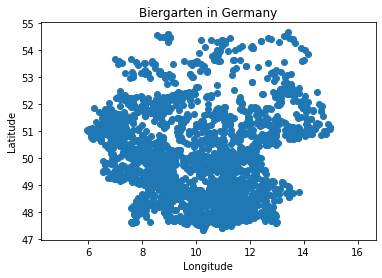

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Collect coords into list
coords = []
for element in data['elements']:
    if element['type'] == 'node':
        lon = element['lon']
        lat = element['lat']
        coords.append((lon, lat))
    elif 'center' in element:
        lon = element['center']['lon']
        lat = element['center']['lat']
        coords.append((lon, lat))
# Convert coordinates into numpy array
X = np.array(coords)
plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Biergarten in Germany')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

In [4]:
import geopandas

In [6]:
import osmnx as ox

In [14]:
place_name = "Leeds, Leeds, great britain"

In [15]:
graph = ox.graph_from_place(place_name)

In [16]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

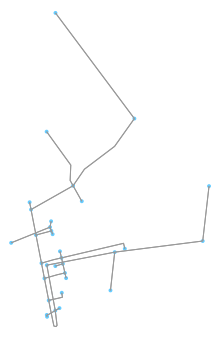

<Figure size 432x288 with 0 Axes>

In [19]:
fig, ax = ox.plot_graph(graph)
plt.tight_layout()

In [20]:
area = ox.gdf_from_place(place_name)

In [26]:
nodes, edges = ox.graph_to_gdfs(graph)

In [27]:
nodes.head()

,y,x,osmid,highway,geometry
6589429764,53.794332,-1.548301,6589429764,NaN,POINT (-1.5483011 53.7943322)
6589429780,53.794196,-1.547500,6589429780,NaN,POINT (-1.5474996 53.7941958)
6589429752,53.794443,-1.548504,6589429752,NaN,POINT (-1.5485044 53.7944434)
6589429754,53.794490,-1.548520,6589429754,NaN,POINT (-1.5485197 53.7944898)
60179366,53.794174,-1.547608,60179366,NaN,POINT (-1.5476079 53.7941739)


In [30]:
edges.highway.tolist()

['footway',
 'footway',
 'footway',
 'footway',
 'footway',
 'footway',
 ['footway', 'steps'],
 'footway',
 'service',
 'service',
 'service',
 'footway',
 'secondary',
 'footway',
 'footway',
 'footway',
 'footway',
 'footway',
 'footway',
 ['footway', 'steps'],
 'footway',
 'cycleway',
 'service',
 'footway',
 'footway',
 'footway',
 'footway',
 ['footway', 'steps'],
 'footway',
 'footway',
 'footway',
 'footway',
 ['footway', 'steps'],
 'footway',
 'footway',
 'footway',
 ['footway', 'steps'],
 'service',
 'steps',
 'footway',
 'footway',
 'footway',
 'footway',
 'steps',
 'footway',
 'footway',
 ['footway', 'steps'],
 'footway',
 'secondary',
 'service',
 'footway',
 'footway',
 ['footway', 'steps'],
 ['footway', 'steps'],
 'footway',
 'footway',
 'footway',
 'cycleway',
 'footway',
 ['footway', 'steps'],
 'footway',
 'footway',
 ['footway', 'steps'],
 'footway',
 'footway',
 'footway']

In [1]:
import osmium as osm
import pandas as pd

class OSMHandler(osm.SimpleHandler):
    def __init__(self):
        osm.SimpleHandler.__init__(self)
        self.osm_data = []

    def tag_inventory(self, elem, elem_type):
        for tag in elem.tags:
            self.osm_data.append([elem_type, 
                                   elem.id, 
                                   elem.version,
                                   elem.visible,
                                   pd.Timestamp(elem.timestamp),
                                   elem.uid,
                                   elem.user,
                                   elem.changeset,
                                   len(elem.tags),
                                   tag.k, 
                                   tag.v])

    def node(self, n):
        self.tag_inventory(n, "node")

    def way(self, w):
        self.tag_inventory(w, "way")

    def relation(self, r):
        self.tag_inventory(r, "relation")


In [2]:
osmhandler = OSMHandler()

In [3]:
osmhandler.apply_file("map.osm")

In [5]:
data_colnames = ['type', 'id', 'version', 'visible', 'ts', 'uid',
                 'user', 'chgset', 'ntags', 'tagkey', 'tagvalue']
df_osm = pd.DataFrame(osmhandler.osm_data, columns=data_colnames)
#df_osm = tag_genome.sort_values(by=['type', 'id', 'ts'])

In [6]:
df_osm.head()

,type,id,version,visible,ts,uid,user,chgset,ntags,tagkey,tagvalue
0,node,350966,8,True,2014-10-25 12:38:11+00:00,1802093,Paul Berry,26320400,2,highway,motorway_junction
1,node,350966,8,True,2014-10-25 12:38:11+00:00,1802093,Paul Berry,26320400,2,ref,3
2,node,358309,22,True,2019-09-17 11:05:38+00:00,158784,bjankuloski,74572444,27,alt_name:la,Leodis;Loidis
3,node,358309,22,True,2019-09-17 11:05:38+00:00,158784,bjankuloski,74572444,27,is_capital,county
4,node,358309,22,True,2019-09-17 11:05:38+00:00,158784,bjankuloski,74572444,27,is_in,"UK,United Kingdom, Yorkshire,West Yorkshire, A..."


In [8]:
df_osm.tagkey.unique()

array(['highway', 'ref', 'alt_name:la', 'is_capital', 'is_in',
       'is_in:continent', 'is_in:country', 'is_in:country_code',
       'is_in:county', 'is_in:historic_county', 'name', 'name:ar',
       'name:en', 'name:fa', 'name:hu', 'name:ja', 'name:ko', 'name:la',
       'name:lt', 'name:mk', 'name:ru', 'name:sr', 'name:uk', 'name:ur',
       'place', 'population', 'source', 'wikidata', 'wikipedia',
       'railway', 'ref:tiploc', 'crossing', 'crossing_ref', 'kerb',
       'tactile_paving', 'traffic_signals', 'junction', 'junction:ref',
       'created_by', 'addr:postcode', 'addr:street', 'contact:website',
       'internet_access', 'operator', 'tourism', 'wheelchair', 'barrier',
       'emergency', 'bicycle', 'foot', 'segregated', 'direction',
       'waterway', 'addr:city', 'addr:housename', 'amenity', 'elevator',
       'internet_access:fee', 'opening_hours', 'phone', 'website',
       'traffic_calming', 'highway_1', 'entrance', 'addr:housenumber',
       'fhrs:id', 'seamark:type

In [9]:
df_osm[df_osm.tagkey=='railway']

,type,id,version,visible,ts,uid,user,chgset,ntags,tagkey,tagvalue
30,node,418047,6,True,2017-12-28 20:02:06+00:00,4903870,Legolash2oLiam,54992665,2,railway,switch
33,node,418128,8,True,2014-09-10 15:29:12+00:00,1227175,mjessen_mdv,25350805,2,railway,junction
736,node,207299192,7,True,2017-12-28 21:45:21+00:00,4903870,Legolash2oLiam,54994957,2,railway,switch
1621,node,301289146,3,True,2017-12-28 21:45:22+00:00,4903870,Legolash2oLiam,54994957,2,railway,switch
3512,node,345037049,4,True,2018-09-13 20:23:37+00:00,3235126,mot_tom,62564709,2,railway,train_station_entrance
...,...,...,...,...,...,...,...,...,...,...,...
39187,way,712497234,1,True,2019-08-10 13:46:21+00:00,114310,Joe E,73221559,5,railway,rail
39194,way,712497235,1,True,2019-08-10 13:46:21+00:00,114310,Joe E,73221559,10,railway,rail
39204,way,712497236,1,True,2019-08-10 13:46:21+00:00,114310,Joe E,73221559,8,railway,rail
39212,way,712497237,1,True,2019-08-10 13:46:21+00:00,114310,Joe E,73221559,11,railway,rail
